# 5 Steps in Pandas to Process Petrophysical Well Logs(part2)

This project is the second part of the previous work that can be found [here](https://towardsdatascience.com/10-steps-in-pandas-to-process-las-file-and-plot-610732093338). To start, we will use the output of previous work to eliminate extra work as already we have processed. If you have worked on a previous project you may write DataFrame into csv file (df.to_csv("1050383876v2.csv")) to use here. Otherwise, you can access from [my github account](https://github.com/mardani72/LAS_Pandas) in the csv format called 1050383876v2.csv.  

In this work, I will cover the following steps:<br>
1) Function Definition<br>
2) Apply Function<br>
3) Lambda Function<br>
4) Cut Function<br>
5) Visualization<br>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Let's read the file into pandas dataframe

In [2]:
df = pd.read_csv('1050383876v2.csv')
df.head()

,DEPT,CNPOR,GR,RHOB,DT,MELCAL,SPOR,Vsh
0,1000.0,4.62,10.82,2.93,51.77,8.26,2.95,0.02
1,1000.5,4.29,11.34,2.94,51.98,8.22,3.10,0.02
2,1001.0,4.14,11.72,2.93,52.10,8.20,3.18,0.02
3,1001.5,4.03,13.02,2.91,52.13,8.20,3.20,0.02
4,1002.0,3.94,12.72,2.88,52.07,8.19,3.16,0.02


### 1- Function defintion

Function in python is a group of statements that perform a specific task. A function can make the larger program more readable. It also can help us to prevent repetition. A function has special structure as:
1- Keyword def, 2- function Name, 3-arguments that we pass values to a function, 4-A colon(:), 5-more statement in body, 6-Retrun statement which is optional.

#### Porosity calculation from Density log

There are several approaches to calculate porosity from petrophysical well logs. Density log measures rock medium bulk density in wellbore condition. Having knowledge of fluid's density filling rock porosity and grain density can help us to calculate the percentage of void areas of the rocks. 

In [5]:
def den(rb, rf, rm):
    # rb = bulk density from well log readings
    # rf = fluid density
    # rm = matrix density or grain density of rocks
    return (rm-rb)*100/(rm-rf)

### 2- Apply Function 

Using the apply function, a predefined function (here, density porosity) can be applied to each elements of DataFrame either in column or row direction.

In [6]:
df["DNPOR"]=df['RHOB'].apply(den, rf=1, rm=2.71 )
df.head()

,DEPT,CNPOR,GR,RHOB,DT,MELCAL,SPOR,Vsh,DNPOR
0,1000.0,4.62,10.82,2.93,51.77,8.26,2.95,0.02,-12.865497
1,1000.5,4.29,11.34,2.94,51.98,8.22,3.10,0.02,-13.450292
2,1001.0,4.14,11.72,2.93,52.10,8.20,3.18,0.02,-12.865497
3,1001.5,4.03,13.02,2.91,52.13,8.20,3.20,0.02,-11.695906
4,1002.0,3.94,12.72,2.88,52.07,8.19,3.16,0.02,-9.941520


As den function takes 3 values (rb, rf, rm), we can introduce the main one from the dataset (rb =df['RHOB']) and use the apply function to define rf and rm constants as manual inputs. Here I assume that fluid content is water with density of 1 and the dominant mineral is Calcite with a density of 2.71. The Density porosity is stored in new column called DNPOR.

### 3- Lambda Function

Lambda function is a simple 1-line function that does not have def or return keywords. In fact, they are implicit. To use this function, we need to type lambda followed by parameters. Then, the colon comes before the return argument.

#### Total Porosity Calculation from Density and Neutron porosity 

In [9]:
Tot_por = lambda DN,CN: (DN+CN)/2

Total porosity is the average of density and neutron porosity

The function name is Tot_por. For lambda function, DN and CN are density and neutron parameters followed by a colon. The average of these two inputs will be returned by the function.

In [29]:
df['TPOR'] = Tot_por(df['CNPOR'], df["DNPOR"])
df.head()

,DEPT,CNPOR,GR,RHOB,DT,MELCAL,SPOR,Vsh,DNPOR,TPOR
0,1000.0,4.62,10.82,2.93,51.77,8.26,2.95,0.02,-13.529412,-4.454706
1,1000.5,4.29,11.34,2.94,51.98,8.22,3.10,0.02,-14.117647,-4.913824
2,1001.0,4.14,11.72,2.93,52.10,8.20,3.18,0.02,-13.529412,-4.694706
3,1001.5,4.03,13.02,2.91,52.13,8.20,3.20,0.02,-12.352941,-4.161471
4,1002.0,3.94,12.72,2.88,52.07,8.19,3.16,0.02,-10.588235,-3.324118


Calling the Tot_por function and introducing corresponding columns of DataFrame as input will create total porosity that will be stored in new column called TPOR in the dataset.

### 4- Cut Function

When we need to segment and sort data values into specific bins, we can use Cut function. Here we will use this function to define simple rock facies based on petrophysical properties.

#### Facies categorization

In [74]:
df['facies_gr'] = pd.cut(df['GR'], bins=[0,40,300], labels=['clean', 'shaly'] )

Facies classification is a huge topic in geoscience and various metrics can come to play but here, we look at it very simple. Based on GR reading in well logs, we can identify clean from shaly formations. A new column is added to the dataset based on GR readings which are binned between 0 and40(clean), and between 40and 300(shaly).

### 5- Visualization

Mainly, the matplotlib library is common in python for plotting. In this work, I prefer to use seaborn library for its simplicity. I want to visualize a scatter plot of density porosity vs. neutron porosity with the legend color of facies that in previous part we defined. This is simply accessible by one line of code while in matplotlib it requires for loop.

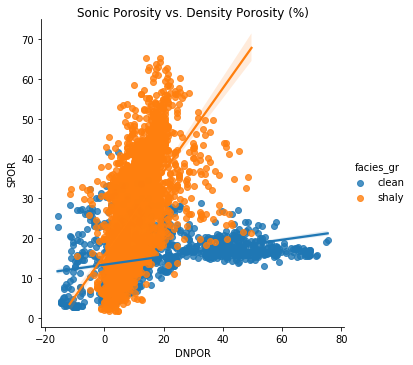

In [115]:
ab = sns.lmplot(x='DNPOR', y='SPOR', hue='facies_gr', data=df)
plt.title('Sonic Porosity vs. Density Porosity', pad=-10)
plt.savefig(fname='ABD.png',dpi = 300)